# Used Mnist data set 

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
def plot_image(image):
  plt.imshow(image,cmap='gray',interpolation='nearest')
  plt.axis('off')

def plot_color_image(image):
  plt.imshow(image,interpolation='nearest')
  plt.axis('off')

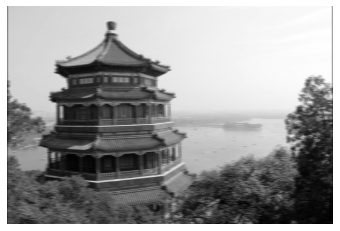

In [9]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') /255
images = np.array([china,flower])
batch_size, height, width, channels = images.shape

# create 2 filters
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images,filters,strides=1, padding='SAME')

plt.imshow(outputs[0, :, :, 1], cmap='gray')
plt.axis('off')
plt.show()

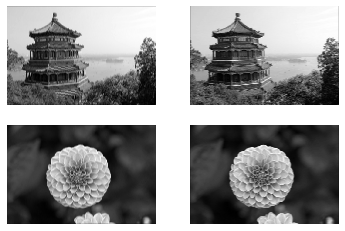

In [10]:
for image_index in (0,1):
  for feature_map_index in (0,1):
    plt.subplot(2,2, image_index * 2 + feature_map_index + 1)
    plot_image(outputs[image_index, :, :, feature_map_index])
plt.show()

In [11]:
def crop(images):
  return images[150:200, 130:250]

Saving figure china_orginal


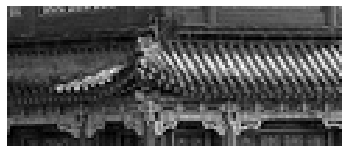

Saving figure china_vertical


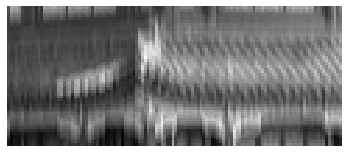

Saving figure china_horizontal


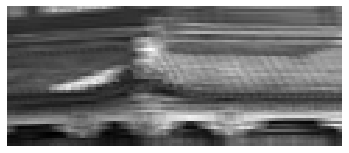

In [13]:
plot_image(crop(images[0,:,:,0]))
save_fig('china_orginal',tight_layout=False)
plt.show()

for feature_map_index,filename in enumerate(["china_vertical", "china_horizontal"]):
  plot_image(crop(outputs[0, :, :, feature_map_index]))
  save_fig(filename, tight_layout=False)
  plt.show()

In [2]:
(X_train_full, y_train_full),(X_test,y_test) =keras.datasets.fashion_mnist.load_data()
X_train,X_valid =X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid =y_train_full[:-5000],y_train_full[-5000:]

X_mean = X_train.mean(axis=0,keepdims=True)
X_std = X_train.std(axis=0,keepdims=True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) /X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
Model_1 = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu",input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10,activation='softmax')
])

In [4]:
Model_1.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',
                metrics=["accuracy"])

In [5]:
history_1 = Model_1.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 24s 8ms/step - loss: 0.7221 - accuracy: 0.7507 - val_loss: 0.4071 - val_accuracy: 0.8528
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4336 - accuracy: 0.8564 - val_loss: 0.3636 - val_accuracy: 0.8750
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3776 - accuracy: 0.8745 - val_loss: 0.3336 - val_accuracy: 0.8848
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3387 - accuracy: 0.8873 - val_loss: 0.3134 - val_accuracy: 0.8930
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3153 - accuracy: 0.8935 - val_loss: 0.3128 - val_accuracy: 0.8918
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2998 - accuracy: 0.9007 - val_loss: 0.3064 - val_accuracy: 0.8974
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2860 - accuracy: 0.9031 - val_loss: 0.2959 - val_ac

In [6]:
score = Model_1.evaluate(X_test,y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = Model_1.predict(X_new)

1/1 [==============================] - 0s 197ms/step
